In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [200]:
df = pd.read_csv('banktransaction.csv')

In [201]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


In [203]:
df['typeofaction'].unique()

array(['cash-in', 'transfer'], dtype=object)

In [204]:
# convert date into integer e.g. 20231012
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y%m%d').astype(int)

In [205]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,20190719,1,type1
1,cash-in,30105,8692,494528,20190517,1,type1
2,cash-in,30105,60094,494528,20190720,1,type1
3,cash-in,30105,20575,494528,20190703,1,type1
4,cash-in,30105,45938,494528,20190526,1,type1


In [206]:
df.isnull().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [207]:
df.shape

(2340, 7)

1399
2340


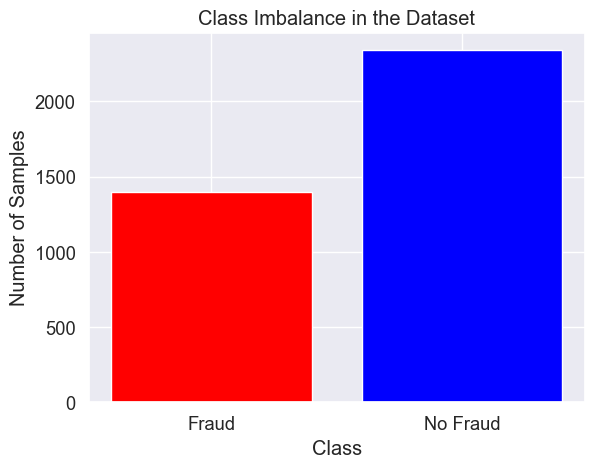

In [208]:
fraud_count = (df['isfraud'] == 1).sum()
no_fraud_count = len(df['isfraud']== 0)

print(fraud_count)
print(no_fraud_count)

# Create a bar plot to display the class imbalance
plt.bar(['Fraud', 'No Fraud'], [fraud_count, no_fraud_count], color=['red', 'blue'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Imbalance in the Dataset')
plt.show()

In [209]:
df['typeofaction'].value_counts()

typeofaction
transfer    1580
cash-in      760
Name: count, dtype: int64

In [210]:
type = df['typeofaction'].value_counts()

In [211]:
transaction=type.index

In [212]:
quantity=type.values

In [213]:
import plotly.express as px

In [214]:
px.pie(df,values=quantity, names=transaction, hole=0.4, title='Type of Transaction')

In [215]:
df.replace(to_replace=['transfer', 'cash-in'],value=[1,2],inplace=True)
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,2,30105,28942,494528,20190719,1,type1
1,2,30105,8692,494528,20190517,1,type1
2,2,30105,60094,494528,20190720,1,type1
3,2,30105,20575,494528,20190703,1,type1
4,2,30105,45938,494528,20190526,1,type1


In [216]:
df['isfraud'] = df['isfraud'].map({0:'no fraud',1:'fraud'})
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,2,30105,28942,494528,20190719,fraud,type1
1,2,30105,8692,494528,20190517,fraud,type1
2,2,30105,60094,494528,20190720,fraud,type1
3,2,30105,20575,494528,20190703,fraud,type1
4,2,30105,45938,494528,20190526,fraud,type1


In [217]:
x=df[['typeofaction','sourceid','destinationid','amountofmoney','date']]
y=df.iloc[:,-2]

In [218]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [219]:
ytrain.value_counts()

isfraud
fraud       1111
no fraud     761
Name: count, dtype: int64

In [220]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Check the class distribution before oversampling
print("Class distribution before SMOTE:", Counter(ytrain))
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:", Counter(ytrain_resampled))


Class distribution before SMOTE: Counter({'fraud': 1111, 'no fraud': 761})
Class distribution after SMOTE: Counter({'fraud': 1111, 'no fraud': 1111})


In [221]:
xtrain,ytrain=xtrain_resampled, ytrain_resampled

DecisionTreeClassifier

In [222]:
from sklearn.tree import DecisionTreeClassifier

In [223]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [224]:
model.score(xtest,ytest)

0.9465811965811965

In [225]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

       fraud       0.96      0.95      0.96       288
    no fraud       0.92      0.94      0.93       180

    accuracy                           0.95       468
   macro avg       0.94      0.95      0.94       468
weighted avg       0.95      0.95      0.95       468

[[274  14]
 [ 11 169]]


In [226]:
import seaborn as sns

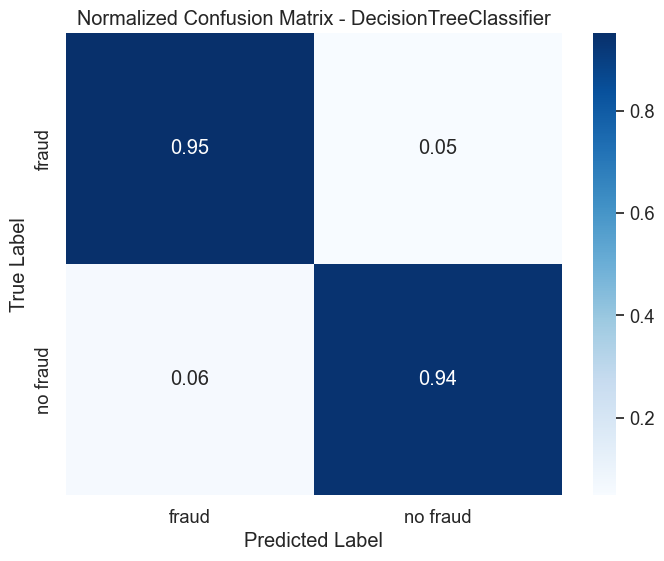

In [227]:
def plot_normalized_confusion_matrix(y_test, y_pred, classes, title):
    cm = confusion_matrix(ytest, ypred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Normalized Confusion Matrix - {title}')
    plt.grid(True)
    plt.show()


plot_normalized_confusion_matrix(ytest, ypred, classes=["fraud", "no fraud"], title='DecisionTreeClassifier')

In [228]:
model.predict([[2,26390,43793,106907,20190325 ]])  #no fraud

/home/tom/anaconda3/envs/sklearn/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['no fraud'], dtype=object)

In [229]:
model.predict([[2,30105,28942,494528,20190719]])  # fraud

/home/tom/anaconda3/envs/sklearn/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['fraud'], dtype=object)

## Save the model

In [230]:
from joblib import dump, load
dump(model, 'model.joblib')
model_in = load('model.joblib')